## Deep Learning Assignment 2 Q2 - Group 255

| Name | StudentID  | Contribution  | 
|:--|:--|--:|
| AMOGH SINGHAL | 2020SC04081 | 100% |
| ABHAY DATTARAY THAPAN | 2020SC04431 | 100% |
| AKSHIT AGRAWAL | 2020SC04956 | 100% |

Let us define a **sequence parity function** as a function that takes in a sequence of binary inputs and returns a sequence **indicating the number of 0’s in the input** so far; 

specifically, `if at time t the 0’s in the input so far is 
* odd it returns 1, 
* and 0 if it is even`. 

For example, 
#### given input sequence   `[0, 1, 0, 1, 1, 0]`, 
#### the parity sequence is `[1, 1, 0, 0, 0, 1]`. 

 
Implement the minimal vanilla recurrent neural network to learn the parity function. 

Explain your rationale using a state transition diagram and parameters of the network.

### 1. Importing Libraries

In [1]:
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LSTM
from tensorflow.keras.optimizers import SGD, Adagrad, Adadelta
from keras.callbacks import TensorBoard
from keras.models import load_model
import numpy as np
import time
import os.path


### 2. Building Model

In [2]:

# building the model
def build_model():
    model = Sequential()
    # since we have taken sequence length as 6, therefore nodes in LSTM taken to be 2^(6-1) ==> 32
    model.add(LSTM(32, input_shape=(None, 1), return_sequences=True))
    # Dropping out 10% of the nodes to avoid overfitting
    model.add(Dropout(0.1))
    # Single ouput node to contain 0 or 1
    model.add(Dense(1))
    model.add(Activation("sigmoid"))

    return model


### Sample Input and Output

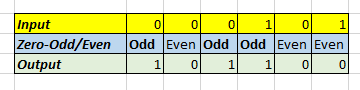

### State Transition Diagram

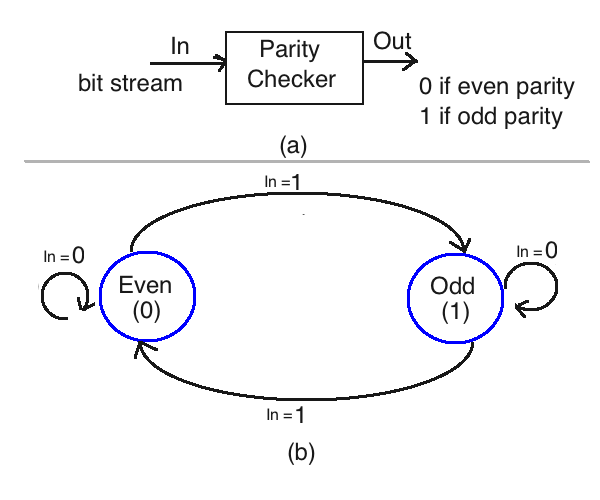

### 3.Making the custom parity function

In [3]:
def parity_function(input_list):
    isZeroCountOdd = True
    zeroCount = 0
    output_list = []
    
    print(f"values -- isZeroCountOdd -- zeroCount -- output_list")
    for values in input_list:
        
        if values == 0:
            zeroCount+=1
        
        if zeroCount % 2 == 0:
            isZeroCountOdd = False
        else:
            isZeroCountOdd = True
        
        if isZeroCountOdd:
            output_list.append(1)
        else:
            output_list.append(0)
        
        print(f"{values} -- {isZeroCountOdd} -- {zeroCount} -- {output_list}")

    return output_list

### 4. Generate synthetic data for training the model

In [4]:

# generating random data
def generate_data(num_points, seq_length):
    x = np.random.randint(2, size=(num_points, seq_length, 1))
    y = np.apply_along_axis(parity_function, 1, x)
    return x, y

### 5. Setting up the variables

In [5]:
seq_length = 6
num_obs_train = 10000
num_obs_test = num_obs_train // 10

X, y = generate_data(num_obs_train, seq_length)
X_test, y_test = generate_data(num_obs_test, seq_length)

tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0,
                          write_graph=True, write_images=False)



values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
1 -- True -- 1 -- [0, 1, 1]
0 -- False -- 2 -- [0, 1, 1, 0]
0 -- True -- 3 -- [0, 1, 1, 0, 1]
1 -- True -- 3 -- [0, 1, 1, 0, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
0 -- False -- 2 -- [0, 1, 0]
0 -- True -- 3 -- [0, 1, 0, 1]
1 -- True -- 3 -- [0, 1, 0, 1, 1]
0 -- False -- 4 -- [0, 1, 0, 1, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
1 -- False -- 0 -- [0, 0, 0]
1 -- False -- 0 -- [0, 0, 0, 0]
1 -- False -- 0 -- [0, 0, 0, 0, 0]
1 -- False -- 0 -- [0, 0, 0, 0, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
1 -- False -- 0 -- [0, 0, 0]
1 -- False -- 0 -- [0, 0, 0, 0]
1 -- False -- 0 -- [0, 0, 0, 0, 0]
1 -- False -- 0 -- [0, 0, 0, 0, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False

0 -- False -- 2 -- [0, 1, 0]
0 -- True -- 3 -- [0, 1, 0, 1]
1 -- True -- 3 -- [0, 1, 0, 1, 1]
0 -- False -- 4 -- [0, 1, 0, 1, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
1 -- False -- 0 -- [0, 0, 0]
0 -- True -- 1 -- [0, 0, 0, 1]
1 -- True -- 1 -- [0, 0, 0, 1, 1]
0 -- False -- 2 -- [0, 0, 0, 1, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
0 -- False -- 2 -- [0, 1, 0]
0 -- True -- 3 -- [0, 1, 0, 1]
0 -- False -- 4 -- [0, 1, 0, 1, 0]
1 -- False -- 4 -- [0, 1, 0, 1, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
1 -- False -- 0 -- [0, 0, 0]
0 -- True -- 1 -- [0, 0, 0, 1]
1 -- True -- 1 -- [0, 0, 0, 1, 1]
0 -- False -- 2 -- [0, 0, 0, 1, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
1 -- True -- 1 -- [1, 1, 1]
1 -- True -- 1 -- [1, 1, 1, 1]
1 -- Tr

values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
0 -- False -- 2 -- [1, 1, 0]
0 -- True -- 3 -- [1, 1, 0, 1]
0 -- False -- 4 -- [1, 1, 0, 1, 0]
1 -- False -- 4 -- [1, 1, 0, 1, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
1 -- True -- 1 -- [1, 1, 1]
1 -- True -- 1 -- [1, 1, 1, 1]
1 -- True -- 1 -- [1, 1, 1, 1, 1]
1 -- True -- 1 -- [1, 1, 1, 1, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
1 -- False -- 0 -- [0, 0, 0]
0 -- True -- 1 -- [0, 0, 0, 1]
1 -- True -- 1 -- [0, 0, 0, 1, 1]
1 -- True -- 1 -- [0, 0, 0, 1, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
1 -- False -- 0 -- [0, 0, 0]
0 -- True -- 1 -- [0, 0, 0, 1]
0 -- False -- 2 -- [0, 0, 0, 1, 0]
0 -- True -- 3 -- [0, 0, 0, 1, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 --

1 -- False -- 0 -- [0, 0, 0, 0]
1 -- False -- 0 -- [0, 0, 0, 0, 0]
1 -- False -- 0 -- [0, 0, 0, 0, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
0 -- False -- 2 -- [0, 1, 0]
0 -- True -- 3 -- [0, 1, 0, 1]
1 -- True -- 3 -- [0, 1, 0, 1, 1]
1 -- True -- 3 -- [0, 1, 0, 1, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
1 -- False -- 0 -- [0, 0, 0]
1 -- False -- 0 -- [0, 0, 0, 0]
1 -- False -- 0 -- [0, 0, 0, 0, 0]
1 -- False -- 0 -- [0, 0, 0, 0, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
1 -- True -- 1 -- [1, 1, 1]
0 -- False -- 2 -- [1, 1, 1, 0]
0 -- True -- 3 -- [1, 1, 1, 0, 1]
1 -- True -- 3 -- [1, 1, 1, 0, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
1 -- True -- 1 -- [1, 1, 1]
1 -- True -- 1 -- [1, 1, 1, 1]
0 -- False -- 2 -- [1, 1, 1, 1, 0]
0 

1 -- False -- 2 -- [1, 1, 0, 0, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
0 -- True -- 3 -- [1, 0, 1]
1 -- True -- 3 -- [1, 0, 1, 1]
1 -- True -- 3 -- [1, 0, 1, 1, 1]
0 -- False -- 4 -- [1, 0, 1, 1, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
0 -- False -- 2 -- [1, 1, 0]
0 -- True -- 3 -- [1, 1, 0, 1]
0 -- False -- 4 -- [1, 1, 0, 1, 0]
0 -- True -- 5 -- [1, 1, 0, 1, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
1 -- False -- 0 -- [0, 0, 0]
1 -- False -- 0 -- [0, 0, 0, 0]
0 -- True -- 1 -- [0, 0, 0, 0, 1]
0 -- False -- 2 -- [0, 0, 0, 0, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
0 -- False -- 2 -- [1, 1, 0]
1 -- False -- 2 -- [1, 1, 0, 0]
1 -- False -- 2 -- [1, 1, 0, 0, 0]
1 -- False -- 2 -- [1, 1, 0, 0, 0, 0]
values -- isZeroCountOdd -- z

1 -- True -- 1 -- [1, 1]
1 -- True -- 1 -- [1, 1, 1]
1 -- True -- 1 -- [1, 1, 1, 1]
1 -- True -- 1 -- [1, 1, 1, 1, 1]
0 -- False -- 2 -- [1, 1, 1, 1, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
0 -- False -- 2 -- [1, 1, 0]
1 -- False -- 2 -- [1, 1, 0, 0]
1 -- False -- 2 -- [1, 1, 0, 0, 0]
1 -- False -- 2 -- [1, 1, 0, 0, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
0 -- True -- 3 -- [1, 0, 1]
1 -- True -- 3 -- [1, 0, 1, 1]
1 -- True -- 3 -- [1, 0, 1, 1, 1]
0 -- False -- 4 -- [1, 0, 1, 1, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
0 -- False -- 2 -- [0, 1, 0]
1 -- False -- 2 -- [0, 1, 0, 0]
0 -- True -- 3 -- [0, 1, 0, 0, 1]
1 -- True -- 3 -- [0, 1, 0, 0, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
1 -- True -- 1 -- [0, 1, 1]
0 -- False -- 2 

1 -- False -- 2 -- [0, 0, 1, 0, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
1 -- False -- 2 -- [1, 0, 0]
0 -- True -- 3 -- [1, 0, 0, 1]
0 -- False -- 4 -- [1, 0, 0, 1, 0]
1 -- False -- 4 -- [1, 0, 0, 1, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
1 -- False -- 0 -- [0, 0, 0]
0 -- True -- 1 -- [0, 0, 0, 1]
0 -- False -- 2 -- [0, 0, 0, 1, 0]
0 -- True -- 3 -- [0, 0, 0, 1, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
0 -- True -- 1 -- [0, 0, 1]
0 -- False -- 2 -- [0, 0, 1, 0]
1 -- False -- 2 -- [0, 0, 1, 0, 0]
0 -- True -- 3 -- [0, 0, 1, 0, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
0 -- False -- 2 -- [1, 1, 0]
1 -- False -- 2 -- [1, 1, 0, 0]
0 -- True -- 3 -- [1, 1, 0, 0, 1]
0 -- False -- 4 -- [1, 1, 0, 0, 1, 0]
values -- isZeroCountOdd --

1 -- False -- 2 -- [1, 1, 0, 0, 0]
1 -- False -- 2 -- [1, 1, 0, 0, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
0 -- False -- 2 -- [1, 1, 0]
1 -- False -- 2 -- [1, 1, 0, 0]
0 -- True -- 3 -- [1, 1, 0, 0, 1]
0 -- False -- 4 -- [1, 1, 0, 0, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
0 -- True -- 1 -- [0, 0, 1]
0 -- False -- 2 -- [0, 0, 1, 0]
0 -- True -- 3 -- [0, 0, 1, 0, 1]
1 -- True -- 3 -- [0, 0, 1, 0, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
1 -- True -- 1 -- [0, 1, 1]
0 -- False -- 2 -- [0, 1, 1, 0]
1 -- False -- 2 -- [0, 1, 1, 0, 0]
0 -- True -- 3 -- [0, 1, 1, 0, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
0 -- False -- 2 -- [1, 1, 0]
1 -- False -- 2 -- [1, 1, 0, 0]
0 -- True -- 3 -- [1, 1, 0, 0, 1]
1 -- True -- 3 -- [1, 1, 0, 0, 1,

values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
0 -- True -- 3 -- [1, 0, 1]
1 -- True -- 3 -- [1, 0, 1, 1]
0 -- False -- 4 -- [1, 0, 1, 1, 0]
0 -- True -- 5 -- [1, 0, 1, 1, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
1 -- False -- 0 -- [0, 0, 0]
0 -- True -- 1 -- [0, 0, 0, 1]
1 -- True -- 1 -- [0, 0, 0, 1, 1]
1 -- True -- 1 -- [0, 0, 0, 1, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
0 -- True -- 1 -- [0, 0, 1]
0 -- False -- 2 -- [0, 0, 1, 0]
0 -- True -- 3 -- [0, 0, 1, 0, 1]
0 -- False -- 4 -- [0, 0, 1, 0, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
1 -- False -- 2 -- [1, 0, 0]
1 -- False -- 2 -- [1, 0, 0, 0]
0 -- True -- 3 -- [1, 0, 0, 0, 1]
0 -- False -- 4 -- [1, 0, 0, 0, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 

0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
0 -- True -- 3 -- [1, 0, 1]
1 -- True -- 3 -- [1, 0, 1, 1]
1 -- True -- 3 -- [1, 0, 1, 1, 1]
0 -- False -- 4 -- [1, 0, 1, 1, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
1 -- True -- 1 -- [0, 1, 1]
1 -- True -- 1 -- [0, 1, 1, 1]
0 -- False -- 2 -- [0, 1, 1, 1, 0]
1 -- False -- 2 -- [0, 1, 1, 1, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
1 -- False -- 0 -- [0, 0, 0]
1 -- False -- 0 -- [0, 0, 0, 0]
1 -- False -- 0 -- [0, 0, 0, 0, 0]
0 -- True -- 1 -- [0, 0, 0, 0, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
1 -- True -- 1 -- [0, 1, 1]
1 -- True -- 1 -- [0, 1, 1, 1]
1 -- True -- 1 -- [0, 1, 1, 1, 1]
1 -- True -- 1 -- [0, 1, 1, 1, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
0 -- False -- 2 -- [1,

values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
0 -- True -- 1 -- [0, 0, 1]
0 -- False -- 2 -- [0, 0, 1, 0]
1 -- False -- 2 -- [0, 0, 1, 0, 0]
1 -- False -- 2 -- [0, 0, 1, 0, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
1 -- False -- 0 -- [0, 0, 0]
1 -- False -- 0 -- [0, 0, 0, 0]
1 -- False -- 0 -- [0, 0, 0, 0, 0]
0 -- True -- 1 -- [0, 0, 0, 0, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
1 -- False -- 2 -- [1, 0, 0]
1 -- False -- 2 -- [1, 0, 0, 0]
1 -- False -- 2 -- [1, 0, 0, 0, 0]
1 -- False -- 2 -- [1, 0, 0, 0, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
0 -- True -- 1 -- [0, 0, 1]
0 -- False -- 2 -- [0, 0, 1, 0]
0 -- True -- 3 -- [0, 0, 1, 0, 1]
1 -- True -- 3 -- [0, 0, 1, 0, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True

0 -- True -- 3 -- [1, 1, 0, 0, 1]
0 -- False -- 4 -- [1, 1, 0, 0, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
1 -- True -- 1 -- [1, 1, 1]
0 -- False -- 2 -- [1, 1, 1, 0]
1 -- False -- 2 -- [1, 1, 1, 0, 0]
0 -- True -- 3 -- [1, 1, 1, 0, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
1 -- False -- 2 -- [1, 0, 0]
1 -- False -- 2 -- [1, 0, 0, 0]
1 -- False -- 2 -- [1, 0, 0, 0, 0]
1 -- False -- 2 -- [1, 0, 0, 0, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
1 -- False -- 2 -- [1, 0, 0]
1 -- False -- 2 -- [1, 0, 0, 0]
1 -- False -- 2 -- [1, 0, 0, 0, 0]
0 -- True -- 3 -- [1, 0, 0, 0, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
0 -- True -- 3 -- [1, 0, 1]
0 -- False -- 4 -- [1, 0, 1, 0]
0 -- True -- 5 -- [1, 0, 1, 0, 1]
1 -- True -- 5 -- [1, 0, 1, 0, 1

1 -- False -- 0 -- [0, 0, 0]
0 -- True -- 1 -- [0, 0, 0, 1]
0 -- False -- 2 -- [0, 0, 0, 1, 0]
1 -- False -- 2 -- [0, 0, 0, 1, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
1 -- False -- 2 -- [1, 0, 0]
0 -- True -- 3 -- [1, 0, 0, 1]
0 -- False -- 4 -- [1, 0, 0, 1, 0]
0 -- True -- 5 -- [1, 0, 0, 1, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
1 -- False -- 0 -- [0, 0, 0]
1 -- False -- 0 -- [0, 0, 0, 0]
0 -- True -- 1 -- [0, 0, 0, 0, 1]
1 -- True -- 1 -- [0, 0, 0, 0, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
0 -- True -- 1 -- [0, 0, 1]
1 -- True -- 1 -- [0, 0, 1, 1]
0 -- False -- 2 -- [0, 0, 1, 1, 0]
0 -- True -- 3 -- [0, 0, 1, 1, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
0 -- False -- 2 -- [0, 1, 0]
1 -- False -- 2 -- [0, 1, 0, 0]
0 -- 

0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
0 -- False -- 2 -- [1, 1, 0]
1 -- False -- 2 -- [1, 1, 0, 0]
1 -- False -- 2 -- [1, 1, 0, 0, 0]
0 -- True -- 3 -- [1, 1, 0, 0, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
0 -- False -- 2 -- [0, 1, 0]
0 -- True -- 3 -- [0, 1, 0, 1]
1 -- True -- 3 -- [0, 1, 0, 1, 1]
1 -- True -- 3 -- [0, 1, 0, 1, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
1 -- False -- 2 -- [1, 0, 0]
0 -- True -- 3 -- [1, 0, 0, 1]
0 -- False -- 4 -- [1, 0, 0, 1, 0]
0 -- True -- 5 -- [1, 0, 0, 1, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
1 -- False -- 0 -- [0, 0, 0]
0 -- True -- 1 -- [0, 0, 0, 1]
1 -- True -- 1 -- [0, 0, 0, 1, 1]
1 -- True -- 1 -- [0, 0, 0, 1, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
0 -- True -- 1 -- [0

values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
0 -- True -- 1 -- [0, 0, 1]
0 -- False -- 2 -- [0, 0, 1, 0]
0 -- True -- 3 -- [0, 0, 1, 0, 1]
1 -- True -- 3 -- [0, 0, 1, 0, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
1 -- True -- 1 -- [0, 1, 1]
0 -- False -- 2 -- [0, 1, 1, 0]
1 -- False -- 2 -- [0, 1, 1, 0, 0]
0 -- True -- 3 -- [0, 1, 1, 0, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
0 -- True -- 1 -- [0, 0, 1]
1 -- True -- 1 -- [0, 0, 1, 1]
1 -- True -- 1 -- [0, 0, 1, 1, 1]
1 -- True -- 1 -- [0, 0, 1, 1, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
0 -- True -- 1 -- [0, 0, 1]
1 -- True -- 1 -- [0, 0, 1, 1]
1 -- True -- 1 -- [0, 0, 1, 1, 1]
1 -- True -- 1 -- [0, 0, 1, 1, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -

1 -- True -- 1 -- [0, 1, 1]
0 -- False -- 2 -- [0, 1, 1, 0]
1 -- False -- 2 -- [0, 1, 1, 0, 0]
0 -- True -- 3 -- [0, 1, 1, 0, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
1 -- True -- 1 -- [0, 1, 1]
1 -- True -- 1 -- [0, 1, 1, 1]
0 -- False -- 2 -- [0, 1, 1, 1, 0]
1 -- False -- 2 -- [0, 1, 1, 1, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
0 -- False -- 2 -- [0, 1, 0]
1 -- False -- 2 -- [0, 1, 0, 0]
0 -- True -- 3 -- [0, 1, 0, 0, 1]
0 -- False -- 4 -- [0, 1, 0, 0, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
0 -- False -- 2 -- [0, 1, 0]
1 -- False -- 2 -- [0, 1, 0, 0]
0 -- True -- 3 -- [0, 1, 0, 0, 1]
1 -- True -- 3 -- [0, 1, 0, 0, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
1 -- False -- 2 -- [1, 0, 0]
0 -- True -- 3 -- [1, 0, 0, 1]
0 -- Fa

values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
0 -- True -- 1 -- [0, 0, 1]
1 -- True -- 1 -- [0, 0, 1, 1]
1 -- True -- 1 -- [0, 0, 1, 1, 1]
0 -- False -- 2 -- [0, 0, 1, 1, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
1 -- False -- 0 -- [0, 0, 0]
0 -- True -- 1 -- [0, 0, 0, 1]
1 -- True -- 1 -- [0, 0, 0, 1, 1]
0 -- False -- 2 -- [0, 0, 0, 1, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
1 -- True -- 1 -- [0, 1, 1]
0 -- False -- 2 -- [0, 1, 1, 0]
0 -- True -- 3 -- [0, 1, 1, 0, 1]
1 -- True -- 3 -- [0, 1, 1, 0, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
1 -- False -- 0 -- [0, 0, 0]
0 -- True -- 1 -- [0, 0, 0, 1]
0 -- False -- 2 -- [0, 0, 0, 1, 0]
0 -- True -- 3 -- [0, 0, 0, 1, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1

0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
1 -- True -- 1 -- [1, 1, 1]
0 -- False -- 2 -- [1, 1, 1, 0]
0 -- True -- 3 -- [1, 1, 1, 0, 1]
1 -- True -- 3 -- [1, 1, 1, 0, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
1 -- False -- 0 -- [0, 0, 0]
0 -- True -- 1 -- [0, 0, 0, 1]
0 -- False -- 2 -- [0, 0, 0, 1, 0]
1 -- False -- 2 -- [0, 0, 0, 1, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
1 -- True -- 1 -- [1, 1, 1]
1 -- True -- 1 -- [1, 1, 1, 1]
1 -- True -- 1 -- [1, 1, 1, 1, 1]
1 -- True -- 1 -- [1, 1, 1, 1, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
1 -- True -- 1 -- [0, 1, 1]
0 -- False -- 2 -- [0, 1, 1, 0]
0 -- True -- 3 -- [0, 1, 1, 0, 1]
1 -- True -- 3 -- [0, 1, 1, 0, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
1 -- False -- 2 -- [1, 0

values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
1 -- True -- 1 -- [0, 1, 1]
1 -- True -- 1 -- [0, 1, 1, 1]
1 -- True -- 1 -- [0, 1, 1, 1, 1]
0 -- False -- 2 -- [0, 1, 1, 1, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
0 -- False -- 2 -- [1, 1, 0]
0 -- True -- 3 -- [1, 1, 0, 1]
0 -- False -- 4 -- [1, 1, 0, 1, 0]
1 -- False -- 4 -- [1, 1, 0, 1, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
1 -- False -- 2 -- [1, 0, 0]
0 -- True -- 3 -- [1, 0, 0, 1]
0 -- False -- 4 -- [1, 0, 0, 1, 0]
0 -- True -- 5 -- [1, 0, 0, 1, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
1 -- True -- 1 -- [0, 1, 1]
1 -- True -- 1 -- [0, 1, 1, 1]
0 -- False -- 2 -- [0, 1, 1, 1, 0]
0 -- True -- 3 -- [0, 1, 1, 1, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 --

1 -- True -- 3 -- [1, 0, 1, 1, 1]
1 -- True -- 3 -- [1, 0, 1, 1, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
0 -- True -- 3 -- [1, 0, 1]
0 -- False -- 4 -- [1, 0, 1, 0]
1 -- False -- 4 -- [1, 0, 1, 0, 0]
1 -- False -- 4 -- [1, 0, 1, 0, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
0 -- False -- 2 -- [0, 1, 0]
0 -- True -- 3 -- [0, 1, 0, 1]
0 -- False -- 4 -- [0, 1, 0, 1, 0]
0 -- True -- 5 -- [0, 1, 0, 1, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
0 -- False -- 2 -- [1, 1, 0]
1 -- False -- 2 -- [1, 1, 0, 0]
0 -- True -- 3 -- [1, 1, 0, 0, 1]
1 -- True -- 3 -- [1, 1, 0, 0, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
0 -- True -- 1 -- [0, 0, 1]
0 -- False -- 2 -- [0, 0, 1, 0]
1 -- False -- 2 -- [0, 0, 1, 0, 0]
0 -- True -- 3 -- [0, 0, 1, 0, 0,

0 -- False -- 2 -- [1, 0]
0 -- True -- 3 -- [1, 0, 1]
1 -- True -- 3 -- [1, 0, 1, 1]
1 -- True -- 3 -- [1, 0, 1, 1, 1]
0 -- False -- 4 -- [1, 0, 1, 1, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
1 -- True -- 1 -- [1, 1, 1]
0 -- False -- 2 -- [1, 1, 1, 0]
1 -- False -- 2 -- [1, 1, 1, 0, 0]
0 -- True -- 3 -- [1, 1, 1, 0, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
0 -- True -- 1 -- [0, 0, 1]
0 -- False -- 2 -- [0, 0, 1, 0]
1 -- False -- 2 -- [0, 0, 1, 0, 0]
0 -- True -- 3 -- [0, 0, 1, 0, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
0 -- True -- 1 -- [0, 0, 1]
1 -- True -- 1 -- [0, 0, 1, 1]
0 -- False -- 2 -- [0, 0, 1, 1, 0]
0 -- True -- 3 -- [0, 0, 1, 1, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
0 -- True -- 3 -- [1, 0, 1]
1 -- True -- 3 

1 -- False -- 2 -- [0, 1, 0, 0]
1 -- False -- 2 -- [0, 1, 0, 0, 0]
1 -- False -- 2 -- [0, 1, 0, 0, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
1 -- False -- 0 -- [0, 0, 0]
0 -- True -- 1 -- [0, 0, 0, 1]
1 -- True -- 1 -- [0, 0, 0, 1, 1]
0 -- False -- 2 -- [0, 0, 0, 1, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
1 -- True -- 1 -- [0, 1, 1]
0 -- False -- 2 -- [0, 1, 1, 0]
1 -- False -- 2 -- [0, 1, 1, 0, 0]
1 -- False -- 2 -- [0, 1, 1, 0, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
1 -- True -- 1 -- [0, 1, 1]
1 -- True -- 1 -- [0, 1, 1, 1]
0 -- False -- 2 -- [0, 1, 1, 1, 0]
1 -- False -- 2 -- [0, 1, 1, 1, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
0 -- True -- 3 -- [1, 0, 1]
0 -- False -- 4 -- [1, 0, 1, 0]
0 -- True -- 5 -- [1, 0, 1, 0, 1]

1 -- False -- 2 -- [0, 0, 1, 1, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
0 -- False -- 2 -- [1, 1, 0]
0 -- True -- 3 -- [1, 1, 0, 1]
1 -- True -- 3 -- [1, 1, 0, 1, 1]
1 -- True -- 3 -- [1, 1, 0, 1, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
1 -- False -- 0 -- [0, 0, 0]
1 -- False -- 0 -- [0, 0, 0, 0]
0 -- True -- 1 -- [0, 0, 0, 0, 1]
0 -- False -- 2 -- [0, 0, 0, 0, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
0 -- False -- 2 -- [0, 1, 0]
1 -- False -- 2 -- [0, 1, 0, 0]
1 -- False -- 2 -- [0, 1, 0, 0, 0]
0 -- True -- 3 -- [0, 1, 0, 0, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
0 -- True -- 3 -- [1, 0, 1]
1 -- True -- 3 -- [1, 0, 1, 1]
0 -- False -- 4 -- [1, 0, 1, 1, 0]
0 -- True -- 5 -- [1, 0, 1, 1, 0, 1]
values -- isZeroCountOdd -- ze

0 -- True -- 3 -- [1, 0, 1]
1 -- True -- 3 -- [1, 0, 1, 1]
1 -- True -- 3 -- [1, 0, 1, 1, 1]
1 -- True -- 3 -- [1, 0, 1, 1, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
0 -- True -- 3 -- [1, 0, 1]
0 -- False -- 4 -- [1, 0, 1, 0]
0 -- True -- 5 -- [1, 0, 1, 0, 1]
0 -- False -- 6 -- [1, 0, 1, 0, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
1 -- True -- 1 -- [0, 1, 1]
0 -- False -- 2 -- [0, 1, 1, 0]
0 -- True -- 3 -- [0, 1, 1, 0, 1]
0 -- False -- 4 -- [0, 1, 1, 0, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
1 -- True -- 1 -- [0, 1, 1]
0 -- False -- 2 -- [0, 1, 1, 0]
0 -- True -- 3 -- [0, 1, 1, 0, 1]
1 -- True -- 3 -- [0, 1, 1, 0, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
0 -- True -- 3 -- [1, 0, 1]
1 -- True -- 3 -- [1, 0, 1, 1]
1 -- True --

1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
0 -- True -- 1 -- [0, 0, 1]
0 -- False -- 2 -- [0, 0, 1, 0]
1 -- False -- 2 -- [0, 0, 1, 0, 0]
0 -- True -- 3 -- [0, 0, 1, 0, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
1 -- False -- 2 -- [1, 0, 0]
1 -- False -- 2 -- [1, 0, 0, 0]
1 -- False -- 2 -- [1, 0, 0, 0, 0]
0 -- True -- 3 -- [1, 0, 0, 0, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
1 -- True -- 1 -- [0, 1, 1]
0 -- False -- 2 -- [0, 1, 1, 0]
1 -- False -- 2 -- [0, 1, 1, 0, 0]
1 -- False -- 2 -- [0, 1, 1, 0, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
1 -- False -- 0 -- [0, 0, 0]
1 -- False -- 0 -- [0, 0, 0, 0]
0 -- True -- 1 -- [0, 0, 0, 0, 1]
0 -- False -- 2 -- [0, 0, 0, 0, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
1 -- True -- 1 

1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
0 -- False -- 2 -- [0, 1, 0]
0 -- True -- 3 -- [0, 1, 0, 1]
0 -- False -- 4 -- [0, 1, 0, 1, 0]
1 -- False -- 4 -- [0, 1, 0, 1, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
1 -- True -- 1 -- [1, 1, 1]
1 -- True -- 1 -- [1, 1, 1, 1]
0 -- False -- 2 -- [1, 1, 1, 1, 0]
1 -- False -- 2 -- [1, 1, 1, 1, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
1 -- True -- 1 -- [0, 1, 1]
0 -- False -- 2 -- [0, 1, 1, 0]
0 -- True -- 3 -- [0, 1, 1, 0, 1]
0 -- False -- 4 -- [0, 1, 1, 0, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
1 -- True -- 1 -- [1, 1, 1]
0 -- False -- 2 -- [1, 1, 1, 0]
1 -- False -- 2 -- [1, 1, 1, 0, 0]
1 -- False -- 2 -- [1, 1, 1, 0, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
0 -- False -- 2 -- [

0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
0 -- False -- 2 -- [1, 1, 0]
0 -- True -- 3 -- [1, 1, 0, 1]
0 -- False -- 4 -- [1, 1, 0, 1, 0]
0 -- True -- 5 -- [1, 1, 0, 1, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
1 -- False -- 2 -- [1, 0, 0]
0 -- True -- 3 -- [1, 0, 0, 1]
1 -- True -- 3 -- [1, 0, 0, 1, 1]
1 -- True -- 3 -- [1, 0, 0, 1, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
1 -- True -- 1 -- [1, 1, 1]
0 -- False -- 2 -- [1, 1, 1, 0]
0 -- True -- 3 -- [1, 1, 1, 0, 1]
1 -- True -- 3 -- [1, 1, 1, 0, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
0 -- True -- 3 -- [1, 0, 1]
1 -- True -- 3 -- [1, 0, 1, 1]
1 -- True -- 3 -- [1, 0, 1, 1, 1]
0 -- False -- 4 -- [1, 0, 1, 1, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
1 -- False -- 2 -- [1, 0,

values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
0 -- False -- 2 -- [0, 1, 0]
1 -- False -- 2 -- [0, 1, 0, 0]
1 -- False -- 2 -- [0, 1, 0, 0, 0]
1 -- False -- 2 -- [0, 1, 0, 0, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
0 -- True -- 1 -- [0, 0, 1]
0 -- False -- 2 -- [0, 0, 1, 0]
0 -- True -- 3 -- [0, 0, 1, 0, 1]
1 -- True -- 3 -- [0, 0, 1, 0, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
1 -- False -- 0 -- [0, 0, 0]
0 -- True -- 1 -- [0, 0, 0, 1]
0 -- False -- 2 -- [0, 0, 0, 1, 0]
0 -- True -- 3 -- [0, 0, 0, 1, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
1 -- True -- 1 -- [1, 1, 1]
1 -- True -- 1 -- [1, 1, 1, 1]
1 -- True -- 1 -- [1, 1, 1, 1, 1]
0 -- False -- 2 -- [1, 1, 1, 1, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 

1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
0 -- True -- 1 -- [0, 0, 1]
0 -- False -- 2 -- [0, 0, 1, 0]
0 -- True -- 3 -- [0, 0, 1, 0, 1]
1 -- True -- 3 -- [0, 0, 1, 0, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
0 -- True -- 1 -- [0, 0, 1]
1 -- True -- 1 -- [0, 0, 1, 1]
0 -- False -- 2 -- [0, 0, 1, 1, 0]
0 -- True -- 3 -- [0, 0, 1, 1, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
0 -- True -- 3 -- [1, 0, 1]
1 -- True -- 3 -- [1, 0, 1, 1]
0 -- False -- 4 -- [1, 0, 1, 1, 0]
1 -- False -- 4 -- [1, 0, 1, 1, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
0 -- True -- 1 -- [0, 0, 1]
1 -- True -- 1 -- [0, 0, 1, 1]
0 -- False -- 2 -- [0, 0, 1, 1, 0]
1 -- False -- 2 -- [0, 0, 1, 1, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
1 -- True -- 1 -- [

1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
1 -- True -- 1 -- [0, 1, 1]
0 -- False -- 2 -- [0, 1, 1, 0]
0 -- True -- 3 -- [0, 1, 1, 0, 1]
1 -- True -- 3 -- [0, 1, 1, 0, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
1 -- False -- 2 -- [1, 0, 0]
1 -- False -- 2 -- [1, 0, 0, 0]
1 -- False -- 2 -- [1, 0, 0, 0, 0]
0 -- True -- 3 -- [1, 0, 0, 0, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
1 -- False -- 2 -- [1, 0, 0]
1 -- False -- 2 -- [1, 0, 0, 0]
0 -- True -- 3 -- [1, 0, 0, 0, 1]
0 -- False -- 4 -- [1, 0, 0, 0, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
0 -- True -- 3 -- [1, 0, 1]
1 -- True -- 3 -- [1, 0, 1, 1]
0 -- False -- 4 -- [1, 0, 1, 1, 0]
1 -- False -- 4 -- [1, 0, 1, 1, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
0 -- True -- 1 -- 

1 -- False -- 2 -- [1, 1, 0, 0]
1 -- False -- 2 -- [1, 1, 0, 0, 0]
1 -- False -- 2 -- [1, 1, 0, 0, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
0 -- False -- 2 -- [0, 1, 0]
0 -- True -- 3 -- [0, 1, 0, 1]
1 -- True -- 3 -- [0, 1, 0, 1, 1]
0 -- False -- 4 -- [0, 1, 0, 1, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
0 -- True -- 1 -- [0, 0, 1]
1 -- True -- 1 -- [0, 0, 1, 1]
1 -- True -- 1 -- [0, 0, 1, 1, 1]
0 -- False -- 2 -- [0, 0, 1, 1, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
1 -- False -- 2 -- [1, 0, 0]
1 -- False -- 2 -- [1, 0, 0, 0]
1 -- False -- 2 -- [1, 0, 0, 0, 0]
0 -- True -- 3 -- [1, 0, 0, 0, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
1 -- True -- 1 -- [0, 1, 1]
0 -- False -- 2 -- [0, 1, 1, 0]
0 -- True -- 3 -- [0, 1, 1, 0, 1]


1 -- True -- 3 -- [0, 0, 1, 0, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
0 -- False -- 2 -- [0, 1, 0]
0 -- True -- 3 -- [0, 1, 0, 1]
0 -- False -- 4 -- [0, 1, 0, 1, 0]
0 -- True -- 5 -- [0, 1, 0, 1, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
0 -- True -- 3 -- [1, 0, 1]
0 -- False -- 4 -- [1, 0, 1, 0]
1 -- False -- 4 -- [1, 0, 1, 0, 0]
0 -- True -- 5 -- [1, 0, 1, 0, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
0 -- False -- 2 -- [0, 1, 0]
1 -- False -- 2 -- [0, 1, 0, 0]
1 -- False -- 2 -- [0, 1, 0, 0, 0]
1 -- False -- 2 -- [0, 1, 0, 0, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
0 -- True -- 1 -- [0, 0, 1]
1 -- True -- 1 -- [0, 0, 1, 1]
1 -- True -- 1 -- [0, 0, 1, 1, 1]
1 -- True -- 1 -- [0, 0, 1, 1, 1, 1]
values -- isZeroCountOdd -- ze

1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
0 -- True -- 1 -- [0, 0, 1]
0 -- False -- 2 -- [0, 0, 1, 0]
1 -- False -- 2 -- [0, 0, 1, 0, 0]
0 -- True -- 3 -- [0, 0, 1, 0, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
0 -- True -- 3 -- [1, 0, 1]
1 -- True -- 3 -- [1, 0, 1, 1]
1 -- True -- 3 -- [1, 0, 1, 1, 1]
1 -- True -- 3 -- [1, 0, 1, 1, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
1 -- False -- 2 -- [1, 0, 0]
1 -- False -- 2 -- [1, 0, 0, 0]
1 -- False -- 2 -- [1, 0, 0, 0, 0]
1 -- False -- 2 -- [1, 0, 0, 0, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
0 -- False -- 2 -- [0, 1, 0]
0 -- True -- 3 -- [0, 1, 0, 1]
0 -- False -- 4 -- [0, 1, 0, 1, 0]
0 -- True -- 5 -- [0, 1, 0, 1, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
1 -- False -- 0 --

0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
1 -- True -- 1 -- [1, 1, 1]
0 -- False -- 2 -- [1, 1, 1, 0]
0 -- True -- 3 -- [1, 1, 1, 0, 1]
0 -- False -- 4 -- [1, 1, 1, 0, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
0 -- False -- 2 -- [1, 1, 0]
0 -- True -- 3 -- [1, 1, 0, 1]
1 -- True -- 3 -- [1, 1, 0, 1, 1]
1 -- True -- 3 -- [1, 1, 0, 1, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
0 -- False -- 2 -- [1, 1, 0]
1 -- False -- 2 -- [1, 1, 0, 0]
1 -- False -- 2 -- [1, 1, 0, 0, 0]
0 -- True -- 3 -- [1, 1, 0, 0, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
1 -- False -- 0 -- [0, 0, 0]
1 -- False -- 0 -- [0, 0, 0, 0]
1 -- False -- 0 -- [0, 0, 0, 0, 0]
0 -- True -- 1 -- [0, 0, 0, 0, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
0 -- False -- 2 -- [0

0 -- True -- 3 -- [0, 1, 0, 0, 1]
0 -- False -- 4 -- [0, 1, 0, 0, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
1 -- True -- 1 -- [1, 1, 1]
0 -- False -- 2 -- [1, 1, 1, 0]
1 -- False -- 2 -- [1, 1, 1, 0, 0]
0 -- True -- 3 -- [1, 1, 1, 0, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
1 -- True -- 1 -- [0, 1, 1]
0 -- False -- 2 -- [0, 1, 1, 0]
1 -- False -- 2 -- [0, 1, 1, 0, 0]
1 -- False -- 2 -- [0, 1, 1, 0, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
0 -- True -- 1 -- [0, 0, 1]
1 -- True -- 1 -- [0, 0, 1, 1]
0 -- False -- 2 -- [0, 0, 1, 1, 0]
1 -- False -- 2 -- [0, 0, 1, 1, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
1 -- False -- 2 -- [1, 0, 0]
0 -- True -- 3 -- [1, 0, 0, 1]
0 -- False -- 4 -- [1, 0, 0, 1, 0]
0 -- True -- 5 -- [1, 0, 0, 1, 0

1 -- False -- 2 -- [1, 1, 0, 0, 0]
0 -- True -- 3 -- [1, 1, 0, 0, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
1 -- True -- 1 -- [1, 1, 1]
0 -- False -- 2 -- [1, 1, 1, 0]
1 -- False -- 2 -- [1, 1, 1, 0, 0]
1 -- False -- 2 -- [1, 1, 1, 0, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
0 -- False -- 2 -- [1, 1, 0]
1 -- False -- 2 -- [1, 1, 0, 0]
0 -- True -- 3 -- [1, 1, 0, 0, 1]
0 -- False -- 4 -- [1, 1, 0, 0, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
0 -- False -- 2 -- [1, 1, 0]
1 -- False -- 2 -- [1, 1, 0, 0]
1 -- False -- 2 -- [1, 1, 0, 0, 0]
0 -- True -- 3 -- [1, 1, 0, 0, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
1 -- False -- 0 -- [0, 0, 0]
0 -- True -- 1 -- [0, 0, 0, 1]
0 -- False -- 2 -- [0, 0, 0, 1, 0]
1 -- False -- 2 -- [0, 0, 0, 1, 

0 -- False -- 2 -- [0, 0, 1, 1, 0]
1 -- False -- 2 -- [0, 0, 1, 1, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
0 -- True -- 1 -- [0, 0, 1]
1 -- True -- 1 -- [0, 0, 1, 1]
0 -- False -- 2 -- [0, 0, 1, 1, 0]
0 -- True -- 3 -- [0, 0, 1, 1, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
0 -- False -- 2 -- [1, 1, 0]
1 -- False -- 2 -- [1, 1, 0, 0]
1 -- False -- 2 -- [1, 1, 0, 0, 0]
1 -- False -- 2 -- [1, 1, 0, 0, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
1 -- False -- 0 -- [0, 0, 0]
1 -- False -- 0 -- [0, 0, 0, 0]
0 -- True -- 1 -- [0, 0, 0, 0, 1]
0 -- False -- 2 -- [0, 0, 0, 0, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
0 -- True -- 3 -- [1, 0, 1]
1 -- True -- 3 -- [1, 0, 1, 1]
1 -- True -- 3 -- [1, 0, 1, 1, 1]
0 -- False -- 4 -- [1, 0, 1, 1,

1 -- False -- 2 -- [0, 1, 0, 0, 0]
0 -- True -- 3 -- [0, 1, 0, 0, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
1 -- True -- 1 -- [0, 1, 1]
0 -- False -- 2 -- [0, 1, 1, 0]
0 -- True -- 3 -- [0, 1, 1, 0, 1]
1 -- True -- 3 -- [0, 1, 1, 0, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
1 -- False -- 2 -- [1, 0, 0]
1 -- False -- 2 -- [1, 0, 0, 0]
1 -- False -- 2 -- [1, 0, 0, 0, 0]
0 -- True -- 3 -- [1, 0, 0, 0, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
1 -- False -- 2 -- [1, 0, 0]
1 -- False -- 2 -- [1, 0, 0, 0]
0 -- True -- 3 -- [1, 0, 0, 0, 1]
1 -- True -- 3 -- [1, 0, 0, 0, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
1 -- False -- 0 -- [0, 0, 0]
0 -- True -- 1 -- [0, 0, 0, 1]
0 -- False -- 2 -- [0, 0, 0, 1, 0]
0 -- True -- 3 -- [0, 0, 0, 1, 0

1 -- False -- 0 -- [0, 0, 0]
0 -- True -- 1 -- [0, 0, 0, 1]
0 -- False -- 2 -- [0, 0, 0, 1, 0]
1 -- False -- 2 -- [0, 0, 0, 1, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
0 -- True -- 3 -- [1, 0, 1]
0 -- False -- 4 -- [1, 0, 1, 0]
0 -- True -- 5 -- [1, 0, 1, 0, 1]
1 -- True -- 5 -- [1, 0, 1, 0, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
1 -- True -- 1 -- [1, 1, 1]
0 -- False -- 2 -- [1, 1, 1, 0]
0 -- True -- 3 -- [1, 1, 1, 0, 1]
1 -- True -- 3 -- [1, 1, 1, 0, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
0 -- True -- 1 -- [0, 0, 1]
0 -- False -- 2 -- [0, 0, 1, 0]
0 -- True -- 3 -- [0, 0, 1, 0, 1]
1 -- True -- 3 -- [0, 0, 1, 0, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
0 -- True -- 3 -- [1, 0, 1]
0 -- False -- 4 -- [1, 0, 1, 0]
0 -- True 

0 -- False -- 4 -- [1, 1, 0, 1, 0]
1 -- False -- 4 -- [1, 1, 0, 1, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
0 -- True -- 3 -- [1, 0, 1]
0 -- False -- 4 -- [1, 0, 1, 0]
0 -- True -- 5 -- [1, 0, 1, 0, 1]
0 -- False -- 6 -- [1, 0, 1, 0, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
1 -- True -- 1 -- [0, 1, 1]
1 -- True -- 1 -- [0, 1, 1, 1]
1 -- True -- 1 -- [0, 1, 1, 1, 1]
0 -- False -- 2 -- [0, 1, 1, 1, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
0 -- True -- 1 -- [0, 0, 1]
0 -- False -- 2 -- [0, 0, 1, 0]
1 -- False -- 2 -- [0, 0, 1, 0, 0]
0 -- True -- 3 -- [0, 0, 1, 0, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
1 -- True -- 1 -- [0, 1, 1]
1 -- True -- 1 -- [0, 1, 1, 1]
1 -- True -- 1 -- [0, 1, 1, 1, 1]
1 -- True -- 1 -- [0, 1, 1, 1, 1, 

1 -- False -- 4 -- [1, 1, 0, 1, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
0 -- False -- 2 -- [0, 1, 0]
1 -- False -- 2 -- [0, 1, 0, 0]
0 -- True -- 3 -- [0, 1, 0, 0, 1]
1 -- True -- 3 -- [0, 1, 0, 0, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
0 -- False -- 2 -- [0, 1, 0]
0 -- True -- 3 -- [0, 1, 0, 1]
0 -- False -- 4 -- [0, 1, 0, 1, 0]
0 -- True -- 5 -- [0, 1, 0, 1, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
1 -- True -- 1 -- [0, 1, 1]
0 -- False -- 2 -- [0, 1, 1, 0]
0 -- True -- 3 -- [0, 1, 1, 0, 1]
1 -- True -- 3 -- [0, 1, 1, 0, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
0 -- True -- 1 -- [0, 0, 1]
1 -- True -- 1 -- [0, 0, 1, 1]
1 -- True -- 1 -- [0, 0, 1, 1, 1]
0 -- False -- 2 -- [0, 0, 1, 1, 1, 0]
values -- isZeroCountOdd -- zer

values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
0 -- False -- 2 -- [1, 1, 0]
1 -- False -- 2 -- [1, 1, 0, 0]
1 -- False -- 2 -- [1, 1, 0, 0, 0]
1 -- False -- 2 -- [1, 1, 0, 0, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
0 -- True -- 1 -- [0, 0, 1]
1 -- True -- 1 -- [0, 0, 1, 1]
0 -- False -- 2 -- [0, 0, 1, 1, 0]
1 -- False -- 2 -- [0, 0, 1, 1, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
0 -- False -- 2 -- [0, 1, 0]
0 -- True -- 3 -- [0, 1, 0, 1]
1 -- True -- 3 -- [0, 1, 0, 1, 1]
1 -- True -- 3 -- [0, 1, 0, 1, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
1 -- True -- 1 -- [0, 1, 1]
0 -- False -- 2 -- [0, 1, 1, 0]
0 -- True -- 3 -- [0, 1, 1, 0, 1]
1 -- True -- 3 -- [0, 1, 1, 0, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 

1 -- True -- 1 -- [1, 1]
0 -- False -- 2 -- [1, 1, 0]
1 -- False -- 2 -- [1, 1, 0, 0]
1 -- False -- 2 -- [1, 1, 0, 0, 0]
1 -- False -- 2 -- [1, 1, 0, 0, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
1 -- False -- 2 -- [1, 0, 0]
0 -- True -- 3 -- [1, 0, 0, 1]
0 -- False -- 4 -- [1, 0, 0, 1, 0]
0 -- True -- 5 -- [1, 0, 0, 1, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
0 -- False -- 2 -- [1, 1, 0]
1 -- False -- 2 -- [1, 1, 0, 0]
1 -- False -- 2 -- [1, 1, 0, 0, 0]
0 -- True -- 3 -- [1, 1, 0, 0, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
0 -- True -- 3 -- [1, 0, 1]
0 -- False -- 4 -- [1, 0, 1, 0]
0 -- True -- 5 -- [1, 0, 1, 0, 1]
1 -- True -- 5 -- [1, 0, 1, 0, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
0 -- True -- 3 -- [1, 0, 1]
0 -- False -- 

0 -- True -- 3 -- [1, 0, 0, 0, 1]
1 -- True -- 3 -- [1, 0, 0, 0, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
1 -- True -- 1 -- [0, 1, 1]
1 -- True -- 1 -- [0, 1, 1, 1]
0 -- False -- 2 -- [0, 1, 1, 1, 0]
0 -- True -- 3 -- [0, 1, 1, 1, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
1 -- True -- 1 -- [1, 1, 1]
1 -- True -- 1 -- [1, 1, 1, 1]
0 -- False -- 2 -- [1, 1, 1, 1, 0]
0 -- True -- 3 -- [1, 1, 1, 1, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
0 -- False -- 2 -- [1, 1, 0]
1 -- False -- 2 -- [1, 1, 0, 0]
0 -- True -- 3 -- [1, 1, 0, 0, 1]
0 -- False -- 4 -- [1, 1, 0, 0, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
1 -- True -- 1 -- [0, 1, 1]
0 -- False -- 2 -- [0, 1, 1, 0]
1 -- False -- 2 -- [0, 1, 1, 0, 0]
0 -- True -- 3 -- [0, 1, 1, 0, 0, 1]


0 -- False -- 4 -- [1, 0, 0, 1, 0]
1 -- False -- 4 -- [1, 0, 0, 1, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
1 -- False -- 0 -- [0, 0, 0]
1 -- False -- 0 -- [0, 0, 0, 0]
0 -- True -- 1 -- [0, 0, 0, 0, 1]
0 -- False -- 2 -- [0, 0, 0, 0, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
0 -- False -- 2 -- [0, 1, 0]
0 -- True -- 3 -- [0, 1, 0, 1]
0 -- False -- 4 -- [0, 1, 0, 1, 0]
1 -- False -- 4 -- [0, 1, 0, 1, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
0 -- True -- 3 -- [1, 0, 1]
1 -- True -- 3 -- [1, 0, 1, 1]
0 -- False -- 4 -- [1, 0, 1, 1, 0]
1 -- False -- 4 -- [1, 0, 1, 1, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
1 -- False -- 2 -- [1, 0, 0]
1 -- False -- 2 -- [1, 0, 0, 0]
1 -- False -- 2 -- [1, 0, 0, 0, 0]
0 -- True -- 3 -- [1, 0, 0, 

0 -- True -- 3 -- [0, 1, 1, 1, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
1 -- True -- 1 -- [1, 1, 1]
0 -- False -- 2 -- [1, 1, 1, 0]
1 -- False -- 2 -- [1, 1, 1, 0, 0]
1 -- False -- 2 -- [1, 1, 1, 0, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
1 -- False -- 2 -- [1, 0, 0]
1 -- False -- 2 -- [1, 0, 0, 0]
0 -- True -- 3 -- [1, 0, 0, 0, 1]
0 -- False -- 4 -- [1, 0, 0, 0, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
1 -- False -- 0 -- [0, 0, 0]
1 -- False -- 0 -- [0, 0, 0, 0]
0 -- True -- 1 -- [0, 0, 0, 0, 1]
1 -- True -- 1 -- [0, 0, 0, 0, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
0 -- True -- 1 -- [0, 0, 1]
0 -- False -- 2 -- [0, 0, 1, 0]
0 -- True -- 3 -- [0, 0, 1, 0, 1]
1 -- True -- 3 -- [0, 0, 1, 0, 1, 1]
values -- isZeroCountOdd -- z

values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
0 -- False -- 2 -- [0, 1, 0]
1 -- False -- 2 -- [0, 1, 0, 0]
0 -- True -- 3 -- [0, 1, 0, 0, 1]
1 -- True -- 3 -- [0, 1, 0, 0, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
1 -- False -- 2 -- [1, 0, 0]
1 -- False -- 2 -- [1, 0, 0, 0]
0 -- True -- 3 -- [1, 0, 0, 0, 1]
1 -- True -- 3 -- [1, 0, 0, 0, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
0 -- True -- 1 -- [0, 0, 1]
0 -- False -- 2 -- [0, 0, 1, 0]
0 -- True -- 3 -- [0, 0, 1, 0, 1]
0 -- False -- 4 -- [0, 0, 1, 0, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
1 -- True -- 1 -- [0, 1, 1]
1 -- True -- 1 -- [0, 1, 1, 1]
0 -- False -- 2 -- [0, 1, 1, 1, 0]
1 -- False -- 2 -- [0, 1, 1, 1, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 

1 -- False -- 2 -- [0, 0, 1, 0, 0]
0 -- True -- 3 -- [0, 0, 1, 0, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
0 -- False -- 2 -- [1, 1, 0]
1 -- False -- 2 -- [1, 1, 0, 0]
0 -- True -- 3 -- [1, 1, 0, 0, 1]
0 -- False -- 4 -- [1, 1, 0, 0, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
1 -- True -- 1 -- [0, 1, 1]
0 -- False -- 2 -- [0, 1, 1, 0]
1 -- False -- 2 -- [0, 1, 1, 0, 0]
0 -- True -- 3 -- [0, 1, 1, 0, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
0 -- False -- 2 -- [1, 1, 0]
1 -- False -- 2 -- [1, 1, 0, 0]
1 -- False -- 2 -- [1, 1, 0, 0, 0]
0 -- True -- 3 -- [1, 1, 0, 0, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
1 -- True -- 1 -- [1, 1, 1]
0 -- False -- 2 -- [1, 1, 1, 0]
1 -- False -- 2 -- [1, 1, 1, 0, 0]
1 -- False -- 2 -- [1, 1, 1, 0, 0,

1 -- True -- 1 -- [1, 1]
1 -- True -- 1 -- [1, 1, 1]
1 -- True -- 1 -- [1, 1, 1, 1]
1 -- True -- 1 -- [1, 1, 1, 1, 1]
0 -- False -- 2 -- [1, 1, 1, 1, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
1 -- True -- 1 -- [0, 1, 1]
1 -- True -- 1 -- [0, 1, 1, 1]
0 -- False -- 2 -- [0, 1, 1, 1, 0]
0 -- True -- 3 -- [0, 1, 1, 1, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
0 -- False -- 2 -- [1, 1, 0]
0 -- True -- 3 -- [1, 1, 0, 1]
0 -- False -- 4 -- [1, 1, 0, 1, 0]
0 -- True -- 5 -- [1, 1, 0, 1, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
1 -- True -- 1 -- [0, 1, 1]
0 -- False -- 2 -- [0, 1, 1, 0]
0 -- True -- 3 -- [0, 1, 1, 0, 1]
0 -- False -- 4 -- [0, 1, 1, 0, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
0 -- True -- 1 -- [0, 0, 1]
0 -- False -- 2 -

1 -- True -- 1 -- [1, 1, 1]
0 -- False -- 2 -- [1, 1, 1, 0]
0 -- True -- 3 -- [1, 1, 1, 0, 1]
0 -- False -- 4 -- [1, 1, 1, 0, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
1 -- False -- 2 -- [1, 0, 0]
1 -- False -- 2 -- [1, 0, 0, 0]
0 -- True -- 3 -- [1, 0, 0, 0, 1]
1 -- True -- 3 -- [1, 0, 0, 0, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
1 -- True -- 1 -- [1, 1, 1]
1 -- True -- 1 -- [1, 1, 1, 1]
1 -- True -- 1 -- [1, 1, 1, 1, 1]
1 -- True -- 1 -- [1, 1, 1, 1, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
0 -- False -- 2 -- [0, 1, 0]
0 -- True -- 3 -- [0, 1, 0, 1]
1 -- True -- 3 -- [0, 1, 0, 1, 1]
1 -- True -- 3 -- [0, 1, 0, 1, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
1 -- True -- 1 -- [1, 1, 1]
0 -- False -- 2 -- [1, 1, 1, 0]
0 -- True -- 

1 -- True -- 1 -- [1, 1]
1 -- True -- 1 -- [1, 1, 1]
0 -- False -- 2 -- [1, 1, 1, 0]
0 -- True -- 3 -- [1, 1, 1, 0, 1]
0 -- False -- 4 -- [1, 1, 1, 0, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
0 -- False -- 2 -- [1, 1, 0]
1 -- False -- 2 -- [1, 1, 0, 0]
1 -- False -- 2 -- [1, 1, 0, 0, 0]
1 -- False -- 2 -- [1, 1, 0, 0, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
0 -- False -- 2 -- [0, 1, 0]
0 -- True -- 3 -- [0, 1, 0, 1]
0 -- False -- 4 -- [0, 1, 0, 1, 0]
1 -- False -- 4 -- [0, 1, 0, 1, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
1 -- False -- 2 -- [1, 0, 0]
0 -- True -- 3 -- [1, 0, 0, 1]
0 -- False -- 4 -- [1, 0, 0, 1, 0]
1 -- False -- 4 -- [1, 0, 0, 1, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
1 -- False -- 2 -- [1, 0, 0]
0 -- True -

values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
0 -- False -- 2 -- [0, 1, 0]
1 -- False -- 2 -- [0, 1, 0, 0]
0 -- True -- 3 -- [0, 1, 0, 0, 1]
0 -- False -- 4 -- [0, 1, 0, 0, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
0 -- True -- 3 -- [1, 0, 1]
1 -- True -- 3 -- [1, 0, 1, 1]
1 -- True -- 3 -- [1, 0, 1, 1, 1]
0 -- False -- 4 -- [1, 0, 1, 1, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
1 -- True -- 1 -- [1, 1, 1]
1 -- True -- 1 -- [1, 1, 1, 1]
1 -- True -- 1 -- [1, 1, 1, 1, 1]
0 -- False -- 2 -- [1, 1, 1, 1, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
1 -- True -- 1 -- [1, 1, 1]
0 -- False -- 2 -- [1, 1, 1, 0]
1 -- False -- 2 -- [1, 1, 1, 0, 0]
0 -- True -- 3 -- [1, 1, 1, 0, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- 

values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
0 -- True -- 3 -- [1, 0, 1]
0 -- False -- 4 -- [1, 0, 1, 0]
0 -- True -- 5 -- [1, 0, 1, 0, 1]
0 -- False -- 6 -- [1, 0, 1, 0, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
0 -- False -- 2 -- [0, 1, 0]
0 -- True -- 3 -- [0, 1, 0, 1]
0 -- False -- 4 -- [0, 1, 0, 1, 0]
1 -- False -- 4 -- [0, 1, 0, 1, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
0 -- True -- 3 -- [1, 0, 1]
1 -- True -- 3 -- [1, 0, 1, 1]
0 -- False -- 4 -- [1, 0, 1, 1, 0]
1 -- False -- 4 -- [1, 0, 1, 1, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
1 -- False -- 2 -- [1, 0, 0]
0 -- True -- 3 -- [1, 0, 0, 1]
0 -- False -- 4 -- [1, 0, 0, 1, 0]
1 -- False -- 4 -- [1, 0, 0, 1, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False --

1 -- False -- 0 -- [0, 0, 0]
1 -- False -- 0 -- [0, 0, 0, 0]
1 -- False -- 0 -- [0, 0, 0, 0, 0]
1 -- False -- 0 -- [0, 0, 0, 0, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
1 -- False -- 0 -- [0, 0, 0]
1 -- False -- 0 -- [0, 0, 0, 0]
1 -- False -- 0 -- [0, 0, 0, 0, 0]
0 -- True -- 1 -- [0, 0, 0, 0, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
0 -- False -- 2 -- [1, 1, 0]
1 -- False -- 2 -- [1, 1, 0, 0]
0 -- True -- 3 -- [1, 1, 0, 0, 1]
0 -- False -- 4 -- [1, 1, 0, 0, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
1 -- False -- 2 -- [1, 0, 0]
1 -- False -- 2 -- [1, 0, 0, 0]
0 -- True -- 3 -- [1, 0, 0, 0, 1]
1 -- True -- 3 -- [1, 0, 0, 0, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
1 -- True -- 1 -- [1, 1, 1]
1 -- True -- 1 -- [1, 1, 1, 1]
1 -- T

1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
0 -- False -- 2 -- [0, 1, 0]
0 -- True -- 3 -- [0, 1, 0, 1]
0 -- False -- 4 -- [0, 1, 0, 1, 0]
0 -- True -- 5 -- [0, 1, 0, 1, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
1 -- False -- 0 -- [0, 0, 0]
0 -- True -- 1 -- [0, 0, 0, 1]
0 -- False -- 2 -- [0, 0, 0, 1, 0]
0 -- True -- 3 -- [0, 0, 0, 1, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
1 -- False -- 2 -- [1, 0, 0]
0 -- True -- 3 -- [1, 0, 0, 1]
0 -- False -- 4 -- [1, 0, 0, 1, 0]
1 -- False -- 4 -- [1, 0, 0, 1, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
1 -- False -- 0 -- [0, 0, 0]
0 -- True -- 1 -- [0, 0, 0, 1]
1 -- True -- 1 -- [0, 0, 0, 1, 1]
0 -- False -- 2 -- [0, 0, 0, 1, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
1 -- True -- 1 -- 

values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
1 -- True -- 1 -- [1, 1, 1]
1 -- True -- 1 -- [1, 1, 1, 1]
1 -- True -- 1 -- [1, 1, 1, 1, 1]
0 -- False -- 2 -- [1, 1, 1, 1, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
1 -- False -- 0 -- [0, 0, 0]
1 -- False -- 0 -- [0, 0, 0, 0]
1 -- False -- 0 -- [0, 0, 0, 0, 0]
0 -- True -- 1 -- [0, 0, 0, 0, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
1 -- True -- 1 -- [0, 1, 1]
1 -- True -- 1 -- [0, 1, 1, 1]
1 -- True -- 1 -- [0, 1, 1, 1, 1]
1 -- True -- 1 -- [0, 1, 1, 1, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
0 -- False -- 2 -- [1, 1, 0]
1 -- False -- 2 -- [1, 1, 0, 0]
1 -- False -- 2 -- [1, 1, 0, 0, 0]
0 -- True -- 3 -- [1, 1, 0, 0, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 --

0 -- True -- 1 -- [0, 0, 0, 0, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
0 -- True -- 3 -- [1, 0, 1]
1 -- True -- 3 -- [1, 0, 1, 1]
1 -- True -- 3 -- [1, 0, 1, 1, 1]
1 -- True -- 3 -- [1, 0, 1, 1, 1, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
0 -- False -- 2 -- [1, 1, 0]
1 -- False -- 2 -- [1, 1, 0, 0]
1 -- False -- 2 -- [1, 1, 0, 0, 0]
0 -- True -- 3 -- [1, 1, 0, 0, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
0 -- False -- 2 -- [1, 1, 0]
0 -- True -- 3 -- [1, 1, 0, 1]
0 -- False -- 4 -- [1, 1, 0, 1, 0]
0 -- True -- 5 -- [1, 1, 0, 1, 0, 1]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
0 -- False -- 2 -- [1, 1, 0]
1 -- False -- 2 -- [1, 1, 0, 0]
1 -- False -- 2 -- [1, 1, 0, 0, 0]
1 -- False -- 2 -- [1, 1, 0, 0, 0, 0]
values -- isZeroCountOdd -- zeroC

values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
0 -- False -- 2 -- [1, 0]
0 -- True -- 3 -- [1, 0, 1]
1 -- True -- 3 -- [1, 0, 1, 1]
1 -- True -- 3 -- [1, 0, 1, 1, 1]
0 -- False -- 4 -- [1, 0, 1, 1, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
0 -- True -- 1 -- [0, 1]
0 -- False -- 2 -- [0, 1, 0]
1 -- False -- 2 -- [0, 1, 0, 0]
0 -- True -- 3 -- [0, 1, 0, 0, 1]
0 -- False -- 4 -- [0, 1, 0, 0, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 1 -- [1]
1 -- True -- 1 -- [1, 1]
0 -- False -- 2 -- [1, 1, 0]
1 -- False -- 2 -- [1, 1, 0, 0]
1 -- False -- 2 -- [1, 1, 0, 0, 0]
1 -- False -- 2 -- [1, 1, 0, 0, 0, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
1 -- False -- 0 -- [0]
1 -- False -- 0 -- [0, 0]
1 -- False -- 0 -- [0, 0, 0]
0 -- True -- 1 -- [0, 0, 0, 1]
1 -- True -- 1 -- [0, 0, 0, 1, 1]
0 -- False -- 2 -- [0, 0, 0, 1, 1, 0]
values -- isZeroCountOdd -- zeroCount -- output_list
0 -- True -- 

### 6. Invoking the model

In [6]:
if os.path.isfile('model.h5'):
    model = load_model('model.h5')
else:
    model = build_model()

In [7]:
model = build_model()

opti = Adagrad(lr=0.5)
model.compile(loss="binary_crossentropy", optimizer=opti, metrics=['binary_accuracy'])
model.fit(X, y, batch_size=10, callbacks=[tensorboard], epochs=5)

score = model.evaluate(X_test, y_test, batch_size=1, verbose=1)
print('Test score:', score)
print('Model saved')
model.save('model.h5')

Epoch 1/5


C:\Users\TA739CM\Miniconda3\lib\site-packages\keras\optimizer_v2\adagrad.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adagrad, self).__init__(name, **kwargs)


1000/1000 [==============================] - 5s 3ms/step - loss: 0.4687 - binary_accuracy: 0.7144
Epoch 2/5
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0024 - binary_accuracy: 1.0000
Epoch 3/5
1000/1000 [==============================] - 3s 3ms/step - loss: 8.7594e-04 - binary_accuracy: 1.0000
Epoch 4/5
1000/1000 [==============================] - 3s 3ms/step - loss: 5.0694e-04 - binary_accuracy: 1.0000
Epoch 5/5
1000/1000 [==============================] - 2s 2ms/step - loss: 7.1796e-05 - binary_accuracy: 1.0000
Test score: [7.179631211329252e-05, 1.0]
Model saved


In [8]:
%load_ext tensorboard

In [9]:
# This takes some time to run
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 3904), started 0:03:44 ago. (Use '!kill 3904' to kill it.)